<a href="https://colab.research.google.com/github/Gi-Woong/SDA-TeamProject/blob/main/SDA_Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 실행 후 런타임 재시작

In [1]:
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록(colab)
%matplotlib inline

# 그래프에 retina format 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# sns.set() 쓰지 말것! -> 폰트 지정 옵션 초기화돼서 한글폰트 깨짐

In [2]:
import pandas as pd
import numpy as np
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import seaborn as sns

# 데이터 불러오기 및 사전 처리

- 사용 데이터
    - 재정 자립도
    - 재정 자주도
- 기타 고려 변수
    - 과징금 및 과태료

DataFrame 변수 명
- df1: 성별/구별 원인별 사망률
- df2: 서울시 구별 성/사망자 수/사망률/연령표준화 사망률
- df3: 일반회계 세입결산
- df4: 재정자립도
- df5: 재정자주도

In [3]:
def read_excel(url):
    return pd.read_excel(url, engine='openpyxl')
# 사망원인별+사망(성별_구별)_20221128192713.xlsx
df_1 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EC%82%AC%EB%A7%9D%EC%9B%90%EC%9D%B8%EB%B3%84+%EC%82%AC%EB%A7%9D(%EC%84%B1%EB%B3%84_%EA%B5%AC%EB%B3%84)_20221128192713.xlsx?raw=true")
# 시군구_사망원인_50항목__성__사망자수__사망률__연령표준화_사망률_1998__20221128212742.xlsx
df_2 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EC%8B%9C%EA%B5%B0%EA%B5%AC_%EC%82%AC%EB%A7%9D%EC%9B%90%EC%9D%B8_50%ED%95%AD%EB%AA%A9__%EC%84%B1__%EC%82%AC%EB%A7%9D%EC%9E%90%EC%88%98__%EC%82%AC%EB%A7%9D%EB%A5%A0__%EC%97%B0%EB%A0%B9%ED%91%9C%EC%A4%80%ED%99%94_%EC%82%AC%EB%A7%9D%EB%A5%A0_1998__20221128212742.xlsx?raw=true")
# 일반회계+세입결산2014~2021.xlsx
df_3 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EC%9D%BC%EB%B0%98%ED%9A%8C%EA%B3%84+%EC%84%B8%EC%9E%85%EA%B2%B0%EC%82%B02014~2021.xlsx?raw=true")
# 재정자립도_20221128193334.xlsx
df_4 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EC%9E%AC%EC%A0%95%EC%9E%90%EB%A6%BD%EB%8F%84_20221128193334.xlsx?raw=true")
# 재정자주도_20221128202517.xlsx
df_5 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EC%9E%AC%EC%A0%95%EC%9E%90%EC%A3%BC%EB%8F%84_20221128202517.xlsx?raw=true")

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# EDA

#### 재정 자립도 참고사항

1. 재정자립도 = 자체수입(지방세+세외수입) / 일반회계 예산액 *100
2. 평균은 예산순계, 자치단체별을 예산총계 기준임
3. 2010-2011 : ( )는 세입과목 개편전 기준으로 산정한 재정자립도임
4. 2014-2020 : 세입과목 개편후 기준으로 산정한 재정자립도임(2014-2016은 ( )에 해당하는 수치)

출처: https://data.seoul.go.kr/dataList/188/S/2/datasetView.do

In [4]:
# 재정자립도(세입과목 개편 후 기준)
df_4_s_after = pd.concat([
    df_4['구분별(1)'],
    df_4.loc[:,'2014':].applymap(lambda x: float(str(x).split("(", 1)[0]))
], axis=1)
df_4_s_after

,구분별(1),2014,2015,2016,2017,2018,2019,2020,2021,2022
0,서울시 평균,84.2,84.3,84.7,80.5,79.2,76.5,76.1,75.6,76.3
1,본청,82.6,82.7,83.0,81.3,80.6,78.4,77.9,77.3,78.1
2,자치구 평균,38.5,35.3,35.5,31.1,29.3,28.1,28.4,29.4,29.4
3,종로구,61.1,56.2,54.6,50.8,47.4,47.4,47.0,47.2,47.5
4,중구,71.6,65.7,65.2,58.4,53.4,54.9,53.5,55.3,55.3
5,용산구,51.2,47.9,47.1,42.4,41.1,39.2,39.3,41.7,41.9
6,성동구,45.0,39.4,40.0,34.5,34.1,32.5,32.7,33.2,34.2
7,광진구,32.1,30.9,32.3,28.1,27.1,26.7,26.2,26.1,25.0
8,동대문구,32.9,29.4,29.5,27.2,25.6,23.8,23.2,24.5,23.7
9,중랑구,25.9,23.9,23.3,20.6,19.0,18.1,17.5,18.2,18.2


In [33]:
df_4_s_after_T = df_4_s_after.T
df_4_s_after_T.columns = df_4_s_after_T.iloc[0]
df_4_s_after_T = df_4_s_after_T.iloc[1:]
df_4_s_after_T.head()

구분별(1),서울시 평균,본청,자치구 평균,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2014,84.2,82.6,38.5,61.1,71.6,51.2,45.0,32.1,32.9,25.9,...,27.6,30.9,33.7,49.2,34.4,31.1,69.0,70.3,51.3,34.9
2015,84.3,82.7,35.3,56.2,65.7,47.9,39.4,30.9,29.4,23.9,...,26.0,27.1,31.6,46.3,28.7,25.3,64.0,66.2,49.3,32.2
2016,84.7,83.0,35.5,54.6,65.2,47.1,40.0,32.3,29.5,23.3,...,25.6,26.6,31.3,45.1,33.1,24.8,63.6,65.0,48.9,33.0
2017,80.5,81.3,31.1,50.8,58.4,42.4,34.5,28.1,27.2,20.6,...,21.6,24.0,27.2,42.0,27.2,20.6,52.5,58.2,42.8,30.1
2018,79.2,80.6,29.3,47.4,53.4,41.1,34.1,27.1,25.6,19.0,...,21.5,22.5,25.6,37.9,26.8,19.4,53.4,53.3,39.0,31.0


In [34]:
df_4_s_after_T.describe()

구분별(1),서울시 평균,본청,자치구 평균,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
count,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
unique,9.0,9.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,8.0,...,9.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
top,84.2,82.6,29.4,47.4,55.3,51.2,45.0,32.1,32.9,18.2,...,27.6,22.5,33.7,49.2,34.4,31.1,69.0,70.3,51.3,34.9
freq,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [35]:
df_4_s_after_T.info()
# null값이 없음이 확인됨.

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 2014 to 2022
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서울시 평균  9 non-null      object
 1   본청      9 non-null      object
 2   자치구 평균  9 non-null      object
 3   종로구     9 non-null      object
 4   중구      9 non-null      object
 5   용산구     9 non-null      object
 6   성동구     9 non-null      object
 7   광진구     9 non-null      object
 8   동대문구    9 non-null      object
 9   중랑구     9 non-null      object
 10  성북구     9 non-null      object
 11  강북구     9 non-null      object
 12  도봉구     9 non-null      object
 13  노원구     9 non-null      object
 14  은평구     9 non-null      object
 15  서대문구    9 non-null      object
 16  마포구     9 non-null      object
 17  양천구     9 non-null      object
 18  강서구     9 non-null      object
 19  구로구     9 non-null      object
 20  금천구     9 non-null      object
 21  영등포구    9 non-null      object
 22  동작구     9 non-null      objec

In [7]:
df_4_s_after_T.index

Index(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

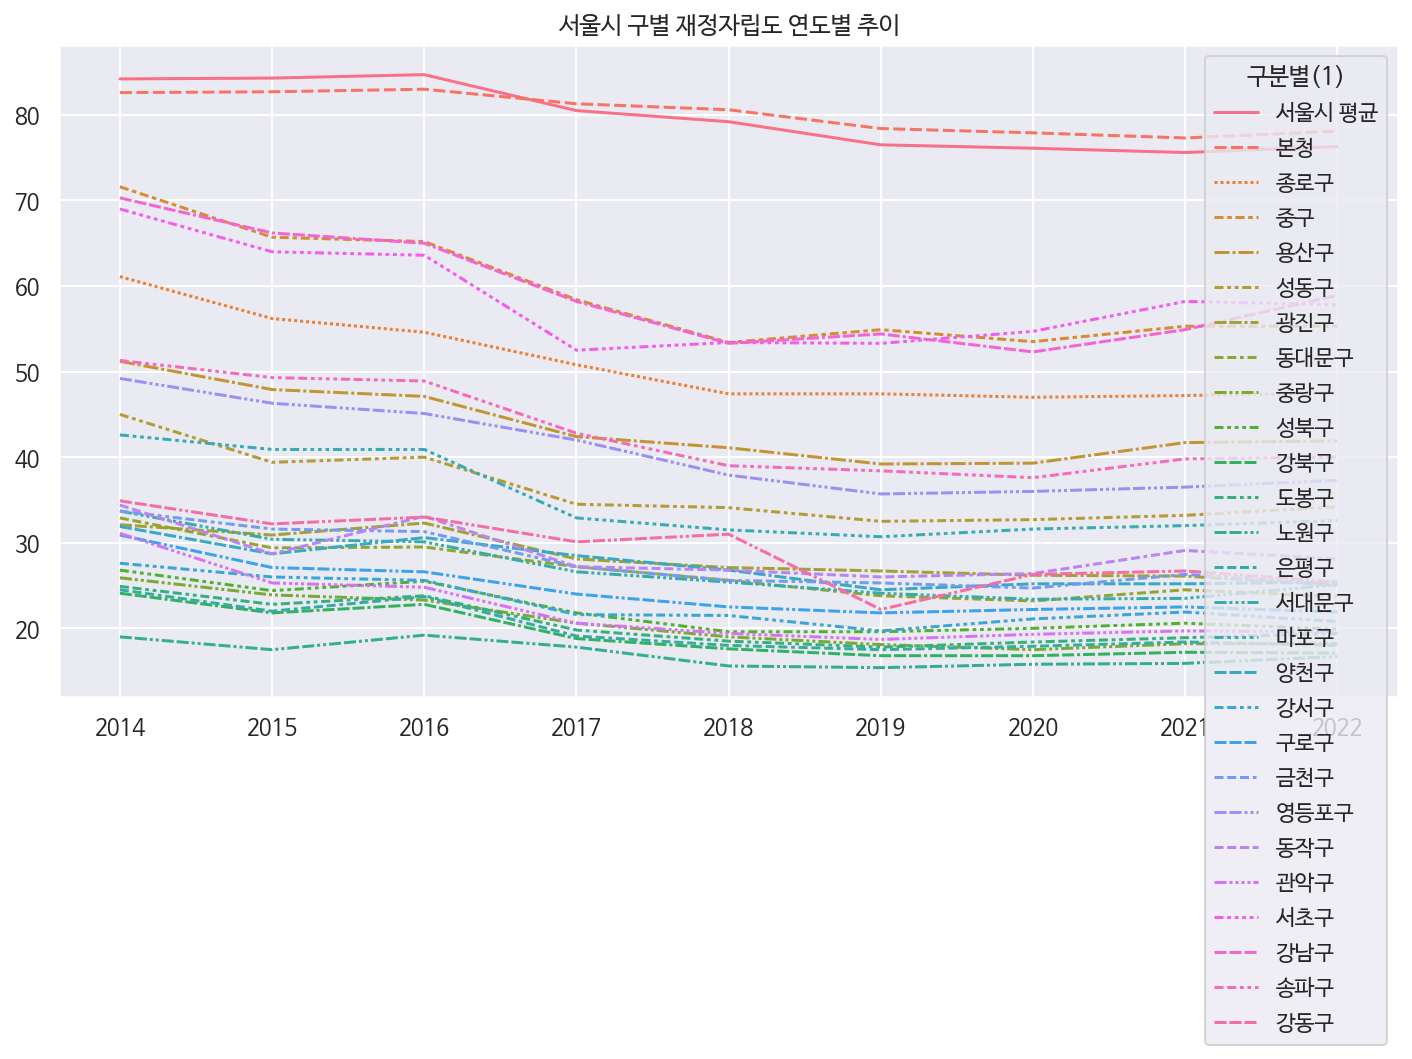

In [32]:
plt.figure(figsize=(12, 6))
plt.title("서울시 구별 재정자립도 연도별 추이")
sns.lineplot(data=df_4_s_after_T.drop(columns=['자치구 평균']))
# plt.show()

In [8]:
df_2

,사망원인별(50항목),시군구별,성별,2021,2021.1,2021.2
0,사망원인별(50항목),시군구별,성별,사망자수 (명),사망률 (십만명당),연령표준화 사망률 (십만명당)
1,계,서울특별시,계,48798.0,516.2,267.4
2,NaN,NaN,남자,27645.0,601.8,365.3
3,NaN,NaN,여자,21153.0,435.2,186.9
4,NaN,종로구,계,982.0,687.8,297.5
...,...,...,...,...,...,...
1556,NaN,NaN,남자,133.0,42.1,33.6
1557,NaN,NaN,여자,63.0,18.6,14.3
1558,NaN,강동구,계,168.0,36.8,28.9
1559,NaN,NaN,남자,107.0,47.8,37.6


# 데이터 전처리

# 상관분석

## 가설 설정

## 상관 분석 조건 확인

### 가설검정

## 상관 분석 진행 및 결과 정리

# 회귀분석


## 가설 설정

## 회귀 분석 조건 확인

### 가설 검정

## 회귀 분석 진행 및 결과 정리

# 결론